## Análise de Vendas

In [1]:
import pandas as pd
import os

#### 1) Lendo arquivos

In [2]:
from os import listdir

lista_csv = [file for file in listdir('vendas')]

for arquivo in lista_csv:
    print(arquivo)

Devolucoes - Belo Horizonte.csv
Devolucoes - Curitiba.csv
Devolucoes - Fortaleza.csv
Devolucoes - Goiás.csv
Devolucoes - Porto Alegre.csv
Devolucoes - Recife.csv
Devolucoes - Rio de Janeiro.csv
Devolucoes - Salvador.csv
Devolucoes - São Paulo.csv
Vendas - Belo Horizonte.csv
Vendas - Curitiba.csv
Vendas - Fortaleza.csv
Vendas - Goiás.csv
Vendas - Porto Alegre.csv
Vendas - Recife.csv
Vendas - Rio de Janeiro.csv
Vendas - Salvador.csv
Vendas - São Paulo.csv


### 2) Unificando em uma única tabela .csv

In [3]:
uni_tabela_vendas = pd.DataFrame()

for arquivo in lista_csv:
    if "Vendas" in arquivo:
        tabela = pd.read_csv(f'vendas/{arquivo}')
        uni_tabela_vendas = pd.concat([uni_tabela_vendas, tabela])


In [ ]:
# uni_tabela_vendas.to_csv('uni_tabela_vendas', index= False)

In [21]:
uni_tabela_vendas = pd.read_csv('uni_tabela_vendas')

display(uni_tabela_vendas)

,Unnamed: 0,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2018,Belo Horizonte,2500
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2018,Belo Horizonte,2500
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2018,Belo Horizonte,5300
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2018,Belo Horizonte,5300
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2018,Belo Horizonte,3500
...,...,...,...,...,...,...,...,...,...
9994,9981,HL7348,SmartWatch,4,João,Junior,4/14/2018,São Paulo,1400
9995,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2018,São Paulo,5300
9996,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2018,São Paulo,5300
9997,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2018,São Paulo,1400


### 3) Removendo os dados NaN da tabela

In [5]:
uni_tabela_vendas.isna().sum()

Unnamed: 0            0
SKU                   0
Produto               0
Quantidade Vendida    0
Primeiro Nome         0
Sobrenome             0
Data                  0
Loja                  0
Preco Unitario        0
dtype: int64

In [6]:
# uni_tabela_vendas.drop('Unnamed: 8', inplace=True, axis=1)

KeyError: "['Unnamed: 8'] not found in axis"

In [22]:
uni_tabela_vendas.to_csv('uni_tabela_vendas', index= False)

In [25]:
uni_tabela_vendas = pd.read_csv('uni_tabela_vendas')

display(uni_tabela_vendas)

,Unnamed: 0,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2018,Belo Horizonte,2500
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2018,Belo Horizonte,2500
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2018,Belo Horizonte,5300
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2018,Belo Horizonte,5300
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2018,Belo Horizonte,3500
...,...,...,...,...,...,...,...,...,...
9994,9981,HL7348,SmartWatch,4,João,Junior,4/14/2018,São Paulo,1400
9995,9984,HL1918,iPhone,4,Itai,Puntel,5/2/2018,São Paulo,5300
9996,9985,HL1918,iPhone,1,Guilherme,Vianna,3/18/2018,São Paulo,5300
9997,9991,HL7348,SmartWatch,5,Antônio,Soares,11/21/2018,São Paulo,1400


In [43]:
print(uni_tabela_vendas.columns.tolist())

['Unnamed: 0', 'SKU', 'Produto', 'Quantidade Vendida', 'Primeiro Nome', 'Sobrenome', 'Data', 'Loja', 'Preco Unitario', 'Faturamento']


### 4) Produtos mais vendidos

In [51]:
mais_vendidos = uni_tabela_vendas.groupby(['Produto'], as_index= False).sum(['Quantidade Vendida']).sort_values(by= 'Quantidade Vendida', ascending= False)

mais_vendidos

,Produto,Unnamed: 0,Quantidade Vendida,Preco Unitario,Faturamento
6,iPhone,15015399,8974,15778100,47562200
5,Televisão,9675708,5931,4905000,14827500
2,Notebook,5393100,3249,3717000,11371500
0,Android,5164013,3183,3631200,10822200
3,SmartWatch,4968367,2980,1393000,4172000
4,Tablet,4920118,2921,1556800,4673600
1,Câmera,4848296,2805,2020200,5890500


In [52]:
print(mais_vendidos.columns.to_list())

['Produto', 'Unnamed: 0', 'Quantidade Vendida', 'Preco Unitario', 'Faturamento']


### 5) Produto que mais faturou

In [28]:
uni_tabela_vendas.head(5)

,Unnamed: 0,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2018,Belo Horizonte,2500
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2018,Belo Horizonte,2500
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2018,Belo Horizonte,5300
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2018,Belo Horizonte,5300
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2018,Belo Horizonte,3500


In [35]:
uni_tabela_vendas['Faturamento'] = uni_tabela_vendas['Quantidade Vendida'] * uni_tabela_vendas['Preco Unitario']

uni_tabela_vendas.head()

,Unnamed: 0,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario,Faturamento
0,17,HL4379,Televisão,2,Carolina,Alfradique,2/25/2018,Belo Horizonte,2500,5000
1,25,HL4379,Televisão,1,Danilo,Rubim,2/20/2018,Belo Horizonte,2500,2500
2,27,HL1918,iPhone,5,Bernard,Pedrosa,7/7/2018,Belo Horizonte,5300,26500
3,54,HL1918,iPhone,5,Lucas,Lemos,12/26/2018,Belo Horizonte,5300,26500
4,67,HL8851,Notebook,5,Bernardo,Botelho,6/8/2018,Belo Horizonte,3500,17500


In [54]:
faturamento = uni_tabela_vendas[['Produto', 'Faturamento']]

faturamento = faturamento.groupby(['Produto'], as_index= False).sum(['Faturamento']).sort_values(by= 'Faturamento', ascending= False)

faturamento.head()

,Produto,Faturamento
6,iPhone,47562200
5,Televisão,14827500
2,Notebook,11371500
0,Android,10822200
1,Câmera,5890500


### 6) Cidade que mais vendeu

In [57]:
mv_cidade = uni_tabela_vendas.groupby(['Loja'], as_index= False).sum(['Faturamento']).sort_values(by= 'Faturamento', ascending= False)

mv_cidade[['Loja', 'Faturamento']]

,Loja,Faturamento
8,São Paulo,22098300
6,Rio de Janeiro,14867800
2,Fortaleza,14087900
7,Salvador,13111300
3,Goiás,7441800
5,Recife,7303000
1,Curitiba,7060500
4,Porto Alegre,6868600
0,Belo Horizonte,6480300


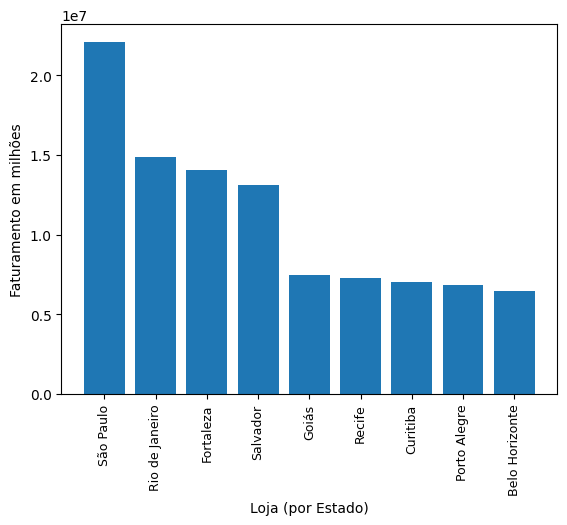

In [79]:
import matplotlib.pyplot as plt

cidades = [city for city, df in mv_cidade.groupby('Loja')]

plt.bar(mv_cidade['Loja'], mv_cidade['Faturamento'])
plt.ylabel('Faturamento em milhões')
plt.xlabel('Loja (por Estado)')
plt.xticks(cidades, rotation= 'vertical', size= 9)
plt.show()